# Régression linéaire à plusieurs variables - Exercices tirés du MOOC d'Andrew Ng

## Chargement des données

Le jeu de données donne la valeur de plusieurs maisons, ainsi que leur taille (pieds carrés) et le nombre de chambres à coucher

### Chargez les données du fichier ex1data1.csv

In [1]:
import numpy as np
import pandas as pd

In [12]:
data = pd.read_csv("ex1data2.csv")

### Visualisez les données (valeurs réelles)

Maintenant, nous avons deux 'features'. Voyez si elles ont le même ordre de grandeur

In [141]:
data

,size,nb_bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900
5,1985,4,299900
6,1534,3,314900
7,1427,3,198999
8,1380,3,212000
9,1494,3,242500


## Définissez quelques variables utiles

### Définissez X et y

X est maintenant une matrice de dimensions m x 2

In [83]:
X = np.array([data['size'], data['nb_bedrooms']])
y = np.array(data['price'])
X

array([[2104, 1600, 2400, 1416, 3000, 1985, 1534, 1427, 1380, 1494, 1940,
        2000, 1890, 4478, 1268, 2300, 1320, 1236, 2609, 3031, 1767, 1888,
        1604, 1962, 3890, 1100, 1458, 2526, 2200, 2637, 1839, 1000, 2040,
        3137, 1811, 1437, 1239, 2132, 4215, 2162, 1664, 2238, 2567, 1200,
         852, 1852, 1203],
       [   3,    3,    3,    2,    4,    4,    3,    3,    3,    3,    4,
           3,    3,    5,    3,    4,    2,    3,    4,    4,    3,    2,
           3,    4,    3,    3,    3,    3,    3,    3,    2,    1,    4,
           3,    4,    3,    3,    4,    4,    4,    2,    3,    4,    3,
           2,    4,    3]])

### Initialisez theta (combien de dimensions?)

In [84]:
theta = np.zeros(3)

### Vérifiez les dimensions de theta et X. Sont-elles compatibles pour implémenter la fonction d'hypothèse?

In [85]:
theta.size

3

In [86]:
X.ndim

2

### Modifiez X en conséquence

In [87]:
X = np.insert(X, 0, 1, axis=0)


In [126]:
X

array([[   1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1],
       [2104, 1600, 2400, 1416, 3000, 1985, 1534, 1427, 1380, 1494, 1940,
        2000, 1890, 4478, 1268, 2300, 1320, 1236, 2609, 3031, 1767, 1888,
        1604, 1962, 3890, 1100, 1458, 2526, 2200, 2637, 1839, 1000, 2040,
        3137, 1811, 1437, 1239, 2132, 4215, 2162, 1664, 2238, 2567, 1200,
         852, 1852, 1203],
       [   3,    3,    3,    2,    4,    4,    3,    3,    3,    3,    4,
           3,    3,    5,    3,    4,    2,    3,    4,    4,    3,    2,
           3,    4,    3,    3,    3,    3,    3,    3,    2,    1,    4,
           3,    4,    3,    3,    4,    4,    4,    2,    3,    4,    3,
           2,    4,    3]])

## Écrivez une fonction pour normaliser les features

In [103]:
def featureNormalize(X): # X == plein de features! => 
    X = X.astype('float')
    n, m = X.shape
    mean = []
    stdev = []
    for i in range(1, n):
        mean.append(X[i].mean())
        stdev.append(X[i].std())
        for j in range(m):
            X[i][j] = (X[i][j] - mean[i - 1]) / stdev[i - 1]
    
    return X, mean, stdev

In [104]:
featureNormalize(X)

(array([[ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
          1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
          1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
          1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
          1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
          1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
          1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
          1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
          1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
          1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
          1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
          1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
          1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
          1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
          1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
          1.00000000e+00,  1.00000000e+00],
        [ 1.31415422e-01, -5.09640698e-01,  5.07908699e-

### Maintenant nous allons devoir adapter nos fonctions _predict_, _fit_, et _cost_ à une situation à plusieurs variables

In [127]:
def predict(X, theta):
    return np.dot(X, theta)
#predict(X[:, 4], np.array([0, 1, 1]))
X[:,4]

array([   1, 3000,    4])

In [114]:
def cost(X, y, theta):
    n, m = X.shape
    ret = 0
    for i in range(n):
        for j in range(m):
            ret += (predict(X[:, i], theta) - y[j]) ** 2
    return (ret / (2 * m))

In [115]:
def sub_sum(theta, X, y, m, j): # [0 0 0], []
    ret = 0
    for i in range(m):
        delta = predict(X[:,i], theta) - y[i]
        ret += delta * X[j][i]
    return ret

def fit_with_cost(X, y, theta, alpha, num_iters):
    n, m = X.shape
    theta = theta.astype('float')
    J_history = []
    for it in range(num_iters):
        J_history.append(cost(X, y, theta)) 
        current_theta = np.array(theta)
        for j in range(n):
            theta[j] = current_theta[j] - alpha * sub_sum(current_theta, X, y, m, j) / m
    return theta, J_history

## Lancez l'entrainement du modèle

Vous êtes libres de choisir alpha et num_iters cette fois!

N'oubliez pas de récupérer la moyenne et l'écart-type calculés!

In [116]:
xNorm, mean, stdev = featureNormalize(X)

In [153]:
th, J_history = fit_with_cost(xNorm, y, theta, 0.03, 1000)

## Visualisez l'évolution du coût (graphe de convergence)

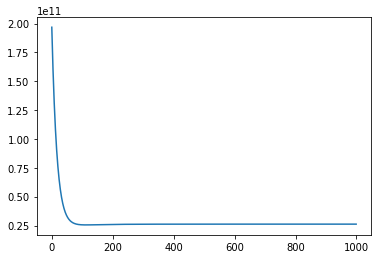

In [154]:
import matplotlib.pyplot as plt
fit = plt.figure()
ax = plt.axes()
ax.plot(J_history)

## Testez votre modèle

Que vaut une maison de 1650 pieds carrés et de 3 chambres à coucher? (Si la valeur est aberrante, vous avez peut-être oublié une étape...)

In [128]:
toPredict = np.array([1., (1650 - mean[0]) / stdev[0], (3 - mean[1]) / stdev[1]])

In [157]:
toPredict

array([ 1.        , -0.44604386, -0.22609337])

In [156]:
predict(toPredict, th)

293081.48594009347